<a href="https://colab.research.google.com/github/aarushijunejaa/Sampling_102103781/blob/main/Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
df=pd.read_csv('CreditCardData.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    772 non-null    int64  
 1   V1      772 non-null    float64
 2   V2      772 non-null    float64
 3   V3      772 non-null    float64
 4   V4      772 non-null    float64
 5   V5      772 non-null    float64
 6   V6      772 non-null    float64
 7   V7      772 non-null    float64
 8   V8      772 non-null    float64
 9   V9      772 non-null    float64
 10  V10     772 non-null    float64
 11  V11     772 non-null    float64
 12  V12     772 non-null    float64
 13  V13     772 non-null    float64
 14  V14     772 non-null    float64
 15  V15     772 non-null    float64
 16  V16     772 non-null    float64
 17  V17     772 non-null    float64
 18  V18     772 non-null    float64
 19  V19     772 non-null    float64
 20  V20     772 non-null    float64
 21  V21     772 non-null    float64
 22  V2

In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
from collections import Counter
print('Original Shape:',Counter(df['Class']))

Original Shape: Counter({0: 763, 1: 9})


In [36]:
X=df.drop(['Class'],axis=1)
y=df['Class']

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(X, y)
print('Balanced Dataset Shape:',Counter(y))

Balanced Dataset Shape: Counter({0: 763, 1: 763})


In [38]:

data=X.join(y)

In [39]:
SRSample=data.sample(400,random_state=42)

In [40]:
Counter({1: 214, 0: 186})


Counter({1: 214, 0: 186})

In [41]:
SysSampleInd=list(range(0,len(data),4))
SysSample=data.iloc[SysSampleInd]

In [42]:
Counter({0: 192, 1: 190})


Counter({0: 192, 1: 190})

In [43]:
StratSample=data.groupby('Class',group_keys=False).apply(lambda x:x.sample(n=200,replace=False,random_state=42))


In [44]:

Counter({0: 200, 1: 200})


Counter({0: 200, 1: 200})

In [45]:
import random
clust={}
ClusSample=pd.DataFrame()
for i in range(len(data)//100):
    clust[i] = data.sample(100)
ind=random.sample(range(len(data)//100),4)
for i in ind:
    ClusSample=pd.concat([ClusSample,clust[i]])


In [46]:
(400, 31)

(400, 31)

In [47]:
BSSample=data.sample(n=400,replace=True,random_state=42)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [49]:
sampling=['Simple Random','Systematic','Stratified','Cluster','Bootstrap']
samples=[SRSample,SysSample,StratSample,ClusSample,BSSample]
result=pd.DataFrame()
X_test=data.drop('Class',axis=1)
scaler=StandardScaler()
X_test=scaler.fit_transform(X_test)
y_test=data['Class']
for i in range(5):
  Sample=samples[i]
  X_train=Sample.drop('Class',axis=1)
  scaler=StandardScaler()
  X_train=scaler.fit_transform(X_train)
  y_train=Sample['Class']
  Accuracy=list(range(5))
  LR=LogisticRegression()
  LR.fit(X_train,y_train)
  LRPred=LR.predict(X_test)
  Accuracy[0]=round(accuracy_score(y_test,LRPred),4)
  RF=RandomForestClassifier(n_estimators=100,random_state=42)
  RF.fit(X_train,y_train)
  RFPred=RF.predict(X_test)
  Accuracy[1]=round(accuracy_score(y_test,RFPred),4)
  SVM=SVC(kernel='rbf',random_state=42)
  SVM.fit(X_train,y_train)
  SVMPred=SVM.predict(X_test)
  Accuracy[2]=round(accuracy_score(y_test,SVMPred),5)
  GBM=GradientBoostingClassifier(n_estimators=100,random_state=42)
  GBM.fit(X_train,y_train)
  GBMPred=GBM.predict(X_test)
  Accuracy[3]=round(accuracy_score(y_test,GBMPred),5)
  MLP=MLPClassifier(hidden_layer_sizes=(100, 50),max_iter=1000,random_state=42)
  MLP.fit(X_train,y_train)
  MLPPred=MLP.predict(X_test)
  Accuracy[4]=round(accuracy_score(y_test,MLPPred),5)
  result[sampling[i]]=Accuracy

In [50]:
result.index=['Logistic Regression','Random Forest Classifier','Support Vector Classifier','Gradient Boosting Classifier','MLPClassifier']
result

,Simple Random,Systematic,Stratified,Cluster,Bootstrap
Logistic Regression,0.91680,0.93120,0.91610,0.88990,0.92140
Random Forest Classifier,0.86570,0.98820,0.73530,0.76340,0.81590
Support Vector Classifier,0.96461,0.96986,0.96920,0.98100,0.95937
Gradient Boosting Classifier,0.71298,0.96592,0.65596,0.72412,0.74967
MLPClassifier,0.99345,0.98427,0.98886,0.99017,0.97575


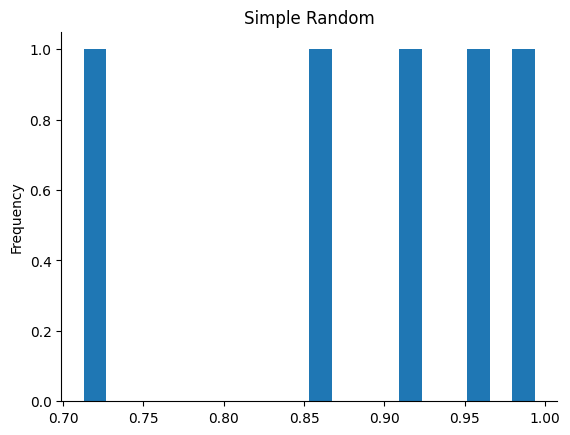

In [51]:
# @title Simple Random

from matplotlib import pyplot as plt
result['Simple Random'].plot(kind='hist', bins=20, title='Simple Random')
plt.gca().spines[['top', 'right',]].set_visible(False)

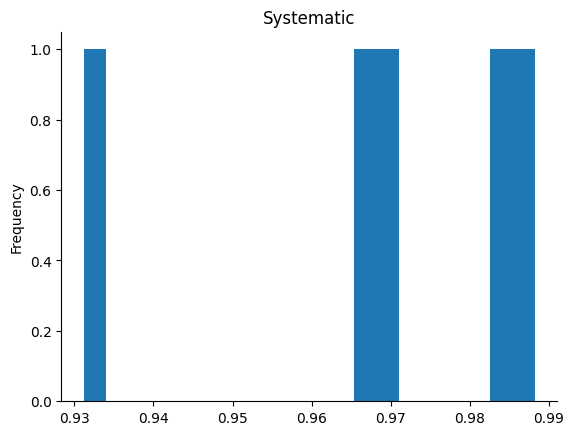

In [52]:
# @title Systematic

from matplotlib import pyplot as plt
result['Systematic'].plot(kind='hist', bins=20, title='Systematic')
plt.gca().spines[['top', 'right',]].set_visible(False)

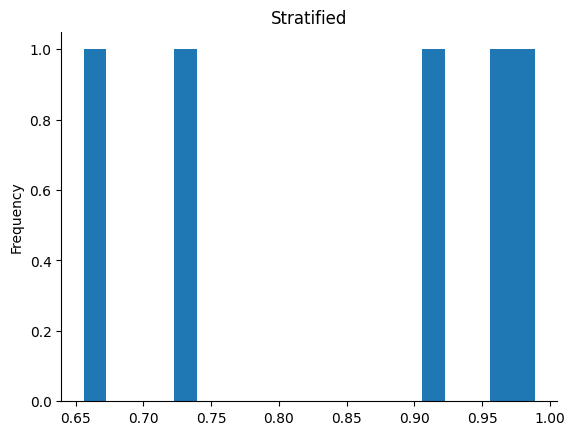

In [53]:
# @title Stratified

from matplotlib import pyplot as plt
result['Stratified'].plot(kind='hist', bins=20, title='Stratified')
plt.gca().spines[['top', 'right',]].set_visible(False)

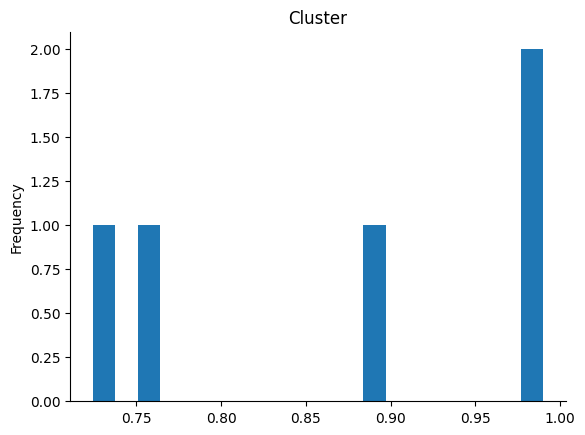

In [54]:
# @title Cluster

from matplotlib import pyplot as plt
result['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)